In [20]:
import pandas as pd
from newspaper import Article
import nltk
import ast
import requests
from tqdm.auto import tqdm
tqdm.pandas()
from bs4 import BeautifulSoup, Comment

In [21]:
headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

In [22]:
initial_tweet_path = 'thehimalayan/tweets.csv'
file_path = "thehimalayan.csv"
result_file_path = "thehimalayan_articles.csv"

In [23]:
df = pd.read_csv(initial_tweet_path, usecols=['id', 'created_at', 'urls'], parse_dates=['created_at'])

In [24]:
list(df)

['id', 'created_at', 'urls']

In [25]:
df.shape

(39023, 3)

In [26]:
df.head()

,id,created_at,urls
0,1386731977542455296,2021-04-26 23:05:42+05:45,['https://bit.ly/3gBXQpn']
1,1386727294434254857,2021-04-26 22:47:05+05:45,['https://bit.ly/2RWCAjG']
2,1386722788099170307,2021-04-26 22:29:11+05:45,['https://bit.ly/2PpCtwj']
3,1386713496511975428,2021-04-26 21:52:16+05:45,['https://bit.ly/3evKsAu']
4,1386709296264658950,2021-04-26 21:35:34+05:45,['https://bit.ly/2R0XC0g']


In [27]:
df.tail()

,id,created_at,urls
39018,947678773498933249,2018-01-01 09:45:01+05:45,['https://wp.me/p6iC0n-1YTA']
39019,947677332487020544,2018-01-01 09:39:17+05:45,['https://wp.me/p6iC0n-1YUL']
39020,947674994766516224,2018-01-01 09:30:00+05:45,['https://wp.me/p6iC0n-1YU4']
39021,947668683454799878,2018-01-01 09:04:55+05:45,['https://wp.me/p6iC0n-1YU3']
39022,947656457888993281,2018-01-01 08:16:20+05:45,['https://wp.me/p6iC0n-1YTU']


In [28]:
df.resample('Y', on='created_at')[['id']].count()

,id
created_at,
2018-12-31 00:00:00+05:45,14060
2019-12-31 00:00:00+05:45,8984
2020-12-31 00:00:00+05:45,12492
2021-12-31 00:00:00+05:45,3487


<AxesSubplot:xlabel='created_at'>

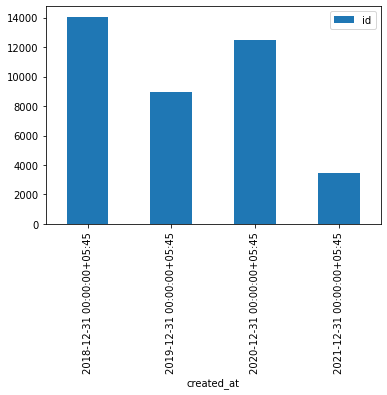

In [29]:
df.resample('Y', on='created_at')[['id']].count().plot(kind='bar')

### Remove tweets without a URL

In [30]:
df=df[df.urls!="[]"]

In [31]:
df = df.drop_duplicates(['urls'], keep="last")

In [32]:
df

,id,created_at,urls
0,1386731977542455296,2021-04-26 23:05:42+05:45,['https://bit.ly/3gBXQpn']
1,1386727294434254857,2021-04-26 22:47:05+05:45,['https://bit.ly/2RWCAjG']
2,1386722788099170307,2021-04-26 22:29:11+05:45,['https://bit.ly/2PpCtwj']
3,1386713496511975428,2021-04-26 21:52:16+05:45,['https://bit.ly/3evKsAu']
4,1386709296264658950,2021-04-26 21:35:34+05:45,['https://bit.ly/2R0XC0g']
...,...,...,...
39018,947678773498933249,2018-01-01 09:45:01+05:45,['https://wp.me/p6iC0n-1YTA']
39019,947677332487020544,2018-01-01 09:39:17+05:45,['https://wp.me/p6iC0n-1YUL']
39020,947674994766516224,2018-01-01 09:30:00+05:45,['https://wp.me/p6iC0n-1YU4']
39021,947668683454799878,2018-01-01 09:04:55+05:45,['https://wp.me/p6iC0n-1YU3']


In [33]:
df['article'] = None

In [34]:
def urlstourl(urls):
    return ast.literal_eval(urls)[0]

df['urls'] = df.urls.progress_apply(urlstourl)

In [35]:
df

,id,created_at,urls,article
0,1386731977542455296,2021-04-26 23:05:42+05:45,https://bit.ly/3gBXQpn,None
1,1386727294434254857,2021-04-26 22:47:05+05:45,https://bit.ly/2RWCAjG,None
2,1386722788099170307,2021-04-26 22:29:11+05:45,https://bit.ly/2PpCtwj,None
3,1386713496511975428,2021-04-26 21:52:16+05:45,https://bit.ly/3evKsAu,None
4,1386709296264658950,2021-04-26 21:35:34+05:45,https://bit.ly/2R0XC0g,None
...,...,...,...,...
39018,947678773498933249,2018-01-01 09:45:01+05:45,https://wp.me/p6iC0n-1YTA,None
39019,947677332487020544,2018-01-01 09:39:17+05:45,https://wp.me/p6iC0n-1YUL,None
39020,947674994766516224,2018-01-01 09:30:00+05:45,https://wp.me/p6iC0n-1YU4,None
39021,947668683454799878,2018-01-01 09:04:55+05:45,https://wp.me/p6iC0n-1YU3,None


In [36]:
df.to_csv(file_path, index=False)

## Chunk

In [37]:
def article_ktmpost(url):
    try:
        req = requests.get(url, headers)
        soup = BeautifulSoup(req.content, 'html.parser')
        result = soup.find("div", {"class": "col-sm-8"})
        return result.text
    except Exception as e:
        print (str(e))
        return 404
    
def article(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        return article.text
    except Exception as e:
        print (str(e))
        return 404        

In [ ]:
pd.read_csv(file_path, nrows=1).head(0).to_csv(result_file_path)
dataframe = pd.read_csv(file_path, iterator=True, chunksize=1000)

for chunk in dataframe:
   chunk['article'] = chunk['urls'].progress_apply(article)
   chunk.to_csv(result_file_path, mode='a', header=None)

In [20]:
df_ = pd.read_csv(result_file_path)

In [24]:
df_[df_.article!='404']

,Unnamed: 0,id,created_at,urls,article
0,0,1377022218178154498,2021-03-31 04:02:35+05:45,https://english.onlinekhabar.com/mithila-house...,"When people talk about Ramayana, one of the gr..."
1,1,1376853071083413505,2021-03-30 16:50:27+05:45,https://english.onlinekhabar.com/uml-feud-nepa...,"Kathmandu, March 30\n\nThe faction of the ruli..."
2,2,1376844319739371521,2021-03-30 16:15:41+05:45,https://english.onlinekhabar.com/bara-sexagena...,"Birgunj, March 30\n\nA 65-year-old woman died ..."
3,3,1376839101039607808,2021-03-30 15:54:56+05:45,https://english.onlinekhabar.com/nepal-covid-1...,"Kathmandu, March 29\n\nThe Ministry of Health ..."
4,4,1376835218607198211,2021-03-30 15:39:31+05:45,https://english.onlinekhabar.com/78-businesses...,"Kathmandu, March 30\n\nThe Department of Food ..."
...,...,...,...,...,...
9091,9091,972791011457032193,2018-03-11 16:52:05+05:45,http://english.onlinekhabar.com/kailali-withcr...,"Kathmandu, March 11\n\nThe Mayor of a town in ..."
9092,9092,972785320977752065,2018-03-11 16:29:28+05:45,http://english.onlinekhabar.com/province-5-chi...,"Kathmandu, March 11\n\nProvince 5 Chief Minist..."
9093,9093,972770673549627392,2018-03-11 15:31:16+05:45,http://english.onlinekhabar.com/kailali-withcr...,"Kathmandu, March 11\n\nThe policemen who relea..."
9094,9094,972760525049335808,2018-03-11 14:50:56+05:45,http://english.onlinekhabar.com/icc-world-cup-...,Watching Nepal play in the World Cup is every ...


In [26]:
# did not have to continue in this case
df_[df_.article!='404'][['id', 'created_at', 'urls', 'article']].to_csv(file_path, index=False)